In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from wordcloud import WordCloud
import re

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to C:\Users\Babar
[nltk_data]     kahn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data=pd.read_csv("BBC News Train.csv")
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [5]:
# need to conver the data type of Text and Category
value_count=data.Category.value_counts()
value_count

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

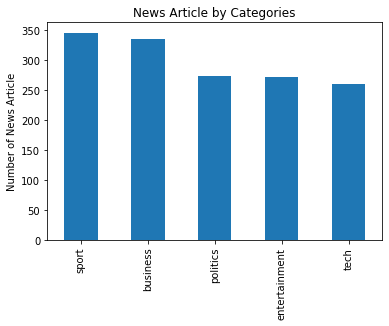

In [6]:
value_count.plot(kind="bar")
plt.ylabel("Number of News Article")
plt.title("News Article by Categories")
plt.show()

In [7]:
# check the length of each articel and add it to the new column word length
data["Word_length"]=data["Text"].str.len()
data.head()

,ArticleId,Text,Category,Word_length
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866
1,154,german business confidence slides german busin...,business,2016
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104
3,1976,lifestyle governs mobile choice faster bett...,tech,3618
4,917,enron bosses in $168m payout eighteen former e...,business,2190


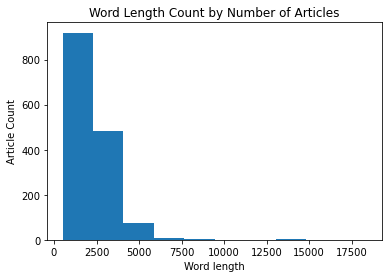

In [8]:
x=data["Word_length"]
plt.hist(x, bins=10)
plt.xlabel("Word length")
plt.ylabel("Article Count")
plt.title("Word Length Count by Number of Articles")
plt.show()

In [10]:
# now we have to encode the categorcal feature to a numerical value
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Category_target']= label_encoder.fit_transform(data['Category'])
data.head()

,ArticleId,Text,Category,Word_length,Category_target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,0
1,154,german business confidence slides german busin...,business,2016,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,0


In [25]:
#lets preprocess the words
def preprocess_text(text):
    # remove all punctuation
    text = re.sub(r'[^\w\d\s]', ' ', text)
    # collapse all white spaces
    text = re.sub(r'\s+', ' ', text)
    # convert to lower case
    text = re.sub(r'^\s+|\s+?$', '', text.lower())
    #taking only alphabetic words
    text = re.sub('[^a-zA-Z]',' ',text)
    # removing only single letters in the 
    text= ' '.join( [w for w in text.split() if len(w)>1])
    # remove stop words and perform stemming
    stop_words = nltk.corpus.stopwords.words('english')
    lemmatizer = WordNetLemmatizer() 
    return ' '.join(
        lemmatizer.lemmatize(term) 
        for term in text.split()
        if term not in set(stop_words)
    )

In [26]:
data["processed"]=data["Text"].apply(preprocess_text)
data.head()

,ArticleId,Text,Category,Word_length,Category_target,processed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,0,worldcom ex bos launch defence lawyer defendin...
1,154,german business confidence slides german busin...,business,2016,0,german business confidence slide german busine...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,0,bbc poll indicates economic gloom citizen majo...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,4,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,0,enron boss payout eighteen former enron direct...


def remove_singleword(text):
     text= ' '.join( [w for w in text.split() if len(w)>1])

In [65]:
#data["processed"].iloc[0]

In [18]:
# now we have processed taxt as a corpus
# save the processed data

In [30]:
data.to_csv("processed_news.csv", index=False)

In [32]:
#0 for business
#1 for entertainment
#2 for politics
#3 for sports
#4 for tech

In [33]:
# now split the data using sklearn train test split
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(data["processed"],data["Category_target"],test_size=0.2,random_state=0)

In [35]:
print("Shape of X_train ",X_train.shape)
print("Shape of X_test ",X_test.shape)
print("Shape of y_train ",y_train.shape)
print("Shape of y_test ",y_test.shape)

Shape of X_train  (1192,)
Shape of X_test  (298,)
Shape of y_train  (1192,)
Shape of y_test  (298,)


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
ngram_range = (1,2)
min_df = 1
#max_df = 1.
max_features = 300

In [38]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_features=max_features,
                        min_df = 1,
                        norm='l2',
                        sublinear_tf=True)

In [39]:
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

[[0.         0.         0.10916838 ... 0.14133155 0.05006875 0.        ]
 [0.10391476 0.         0.10300891 ... 0.05588471 0.         0.        ]
 [0.         0.         0.         ... 0.         0.0566816  0.        ]
 ...
 [0.         0.         0.         ... 0.         0.13753112 0.        ]
 [0.         0.         0.         ... 0.07471983 0.09735085 0.        ]
 [0.         0.         0.         ... 0.15247947 0.         0.        ]]


In [41]:
features_train.shape

(1192, 300)

In [40]:
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(298, 300)


In [42]:
from sklearn.naive_bayes import MultinomialNB 

In [43]:
clf = MultinomialNB(alpha=0.01)

In [44]:
# training the model
clf.fit(features_train, labels_train)

MultinomialNB(alpha=0.01)

In [45]:
#predicting the values
y_pred = clf.predict(features_test)

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [47]:
print(classification_report(labels_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.94      0.94      0.94        63
           2       0.93      0.94      0.93        53
           3       0.95      0.94      0.95        65
           4       0.93      0.94      0.93        53

    accuracy                           0.95       298
   macro avg       0.95      0.95      0.95       298
weighted avg       0.95      0.95      0.95       298



In [48]:
print(accuracy_score(labels_test,y_pred))

0.9463087248322147


In [49]:
import pickle

In [50]:
file=open("final2.pkl","wb")
pickle.dump(clf,file)

In [79]:
with open ("final_model","wb") as f:
    pickle.dump(clf,f)

In [52]:
txt="worldcom ex boss launches defence lawyers defending former worldcom chief bernie ebbers battery fraud charges called company whistleblower first witness cynthia cooper worldcom ex head internal accounting alerted directors irregular accounting practices us telecoms giant warnings led collapse firm following discovery bn bn accounting fraud mr ebbers pleaded guilty charges fraud conspiracy prosecution lawyers argued mr ebbers orchestrated series accounting tricks worldcom ordering employees hide expenses inflate revenues meet wall street earnings estimates ms cooper runs consulting business told jury new york wednesday external auditors arthur andersen approved worldcom accounting early said andersen given green light procedures practices used worldcom mr ebber lawyers said unaware fraud arguing auditors alert problems ms cooper also said shareholder meetings mr ebbers often passed technical questions company finance chief giving brief answers prosecution star witness former worldcom financial chief scott sullivan said mr ebbers ordered accounting adjustments firm telling hit books however ms cooper said mr sullivan mentioned anything uncomfortable worldcom accounting audit committee meeting mr ebbers could face jail sentence years convicted charges facing worldcom emerged bankruptcy protection known mci last week mci agreed buyout verizon communications deal valued bn."

In [63]:
def input_predict(text):
    #preprocess the text
    text=preprocess_text(text)
    #convert text to a list
    yh=[text]
    #transform the input 
    inputpredict = tfidf.transform(yh)
    #predict the user input text
    y_predict_userinput = clf.predict(inputpredict)
    
    return y_predict_userinput


In [62]:
text="lifestyle  governs mobile choice  faster  better or funkier hardware alone is not going to help phone firms sell more handsets  research suggests.  instead  phone firms keen to get more out of their customers should not just be pushing the technology for its own sake. consumers are far more interested in how handsets fit in with their lifestyle than they are in screen size  onboard memory or the chip inside  shows an in-depth study by handset maker ericsson.  historically in the industry there has been too much focus on using technology   said dr michael bjorn  senior advisor on mobile media at ericsson s consumer and enterprise lab.  we have to stop saying that these technologies will change their lives   he said.  we should try to speak to consumers in their own language and help them see how it fits in with what they are doing   he told the bbc news website.  for the study  ericsson interviewed 14 000 mobile phone owners on the ways they use their phone.  people s habits remain the same   said dr bjorn.  they just move the activity into the mobile phone as it s a much more convenient way to do it.   one good example of this was diary-writing among younger people  he said. while diaries have always been popular  a mobile phone -- especially one equipped with a camera -- helps them keep it in a different form. youngsters  use of text messages also reflects their desire to chat and keep in contact with friends and again just lets them do it in a slightly changed way. dr bjorn said that although consumers do what they always did but use a phone to do it  the sheer variety of what the new handset technologies make possible does gradually drive new habits and lifestyles. ericsson s research has shown that consumers divide into different  tribes  that use phones in different ways. dr bjorn said groups dubbed  pioneers  and  materialists  were most interested in trying new things and were behind the start of many trends in phone use.  for instance   he said   older people are using sms much more than they did five years ago.  this was because younger users  often the children of ageing mobile owners  encouraged older people to try it so they could keep in touch.  another factor governing the speed of change in mobile phone use was the simple speed with which new devices are bought by pioneers and materialists. only when about 25% of people have handsets with new innovations on them  such as cameras  can consumers stop worrying that if they send a picture message the person at the other end will be able to see it.  once this significant number of users is passed  use of new innovations tends to take off. dr bjorn said that early reports of camera phone usage in japan seemed to imply that the innovation was going to be a flop. however  he said  now 45% of the japanese people ericsson questioned use their camera phone at least once a month. in 2003 the figure was 29%. similarly  across europe the numbers of people taking snaps with cameras is starting to rise. in 2003 only 4% of the people in the uk took a phonecam snap at least once a month. now the figure is 14%. similar rises have been seen in many other european nations. dr bjorn said that people also used their camera phones in very different ways to film and even digital cameras.  usage patterns for digital cameras are almost exactly replacing usage patterns for analogue cameras   he said. digital cameras tend to be used on significant events such as weddings  holidays and birthdays. by contrast  he said  camera phones were being used much more to capture a moment and were being woven into everyday life."

In [64]:
input_predict(text)

array([4])

In [70]:
text="wales silent on grand slam talk rhys williams says wales are still not thinking of winning the grand slam despite a third six nations win.   that s the last thing on our minds at the moment   said williams  a second- half replacement in saturday s 24-18 win over france in paris.  we all realise how difficult a task it is to go up to scotland and beat them.  we ve come unstuck there a couple of times recently so our focus is on that game and we ll worry about ireland hopefully after we ve beaten scotland.  with captain gareth thomas ruled out of the rest of the campaign with a broken thumb  williams is vying for his first start in the championship so far.  kevin morgan is probably favourite to replace thomas at full-back  leaving williams and hal luscombe to battle for the right wing berth. a hamstring injury denied luscombe the opportunity to make a third successive start  but the dragons winger is expected to be fit for the trip to murrayfield on 13 march. hooker robin mcbryde is doubtful after picking up a knee injury in paris  but centre sonny parker and flanker colin charvis are set to recover from injury to be in contention for selection. said wales assistant coach scott johnson:  they ve worked through the weekend and the reports are a bit more positive.  so we re getting a couple back and that adds to the depth of the squad.  scotland secured their first win of the campaign on saturday by grinding out an 18-10 win over italy.  matt williams  side has shown little in attack  but johnson insisted the scots will be difficult opposition to break down.  italy are really brave opposition and sometimes it s very hard to win   he said.  so an ugly win can be just as effective as a 30 or 40 point victory.  scotland are a hard side and very underrated so we re not taking anything for granted.  we re not basking in the glory of winning our first three games. we ve got to be diligent in our preparation.  that s my job and we ve got to make sure we re focused."

In [71]:
input_predict(text)

array([3])

In [78]:
 with open('tfidf.pk', 'wb') as file:
        pickle.dump(tfidf, file)

In [82]:
#save vectorizer vocablury
with open('tfidf', 'wb') as file:
    pickle.dump(tfidf, file)